# 4.10 (2)- Final Instacart Basket Analysis

### Table of Contents:

#### 1. Import Libraries
#### 2. Import Data
#### 3. Data Checks/ Data Cleaning 
#### 4. DF Merge
#### 5. Q5- Customer profiling based on age, income, goods in 'department_id', and # of dependants 
#### 6. Q6- Visualizations
#### 7. Q7- Aggregation 
#### 8. Q8- Indentify if there is a difference in customer behavior across regions
----------------------------------------------------------------------------------------------------------

### 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 2. Import Data

In [4]:
# Create a path

In [5]:
path = r'/Users/amritamaniram/Desktop/Instacart Basket Analysis 2023'

In [6]:
# Import df from 4.10 (1) - inclusion df

In [7]:
df_include = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'inclusion_high_and_low_spenders.pkl'))

In [8]:
# Import Departments_Wrangled.csv

In [9]:
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'dept.csv'), index_col = False)

### 3. Data Checks/ Data Cleaning 

In [10]:
# Ensure the data was imported correctly in this script

In [11]:
df_include.shape

(30992664, 33)

##### Data Wrangling/Cleaning

In [12]:
df_include.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30992664 entries, 0 to 32434200
Data columns (total 33 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   product_id                     int64   
 1   product_name                   object  
 2   aisle_id                       int64   
 3   department_id                  int64   
 4   prices                         float64 
 5   order_id                       object  
 6   user_id                        object  
 7   eval_set                       object  
 8   order_number                   int64   
 9   orders_day_of_week             int64   
 10  order_hour_of_day              int64   
 11  time_elapsed_since_last_order  float64 
 12  add_to_cart_order              int64   
 13  reordered                      int64   
 14  price_range_loc                object  
 15  busiest_day                    object  
 16  busiest_days                   object  
 17  busiest_period_of_day         

In [13]:
# Change data type of 'department_id' to str

In [14]:
df_include['department_id'] = df_include['department_id'].astype('str')

In [15]:
# Verify update

In [16]:
df_include['department_id'].dtype

dtype('O')

In [17]:
# Update Successful

In [18]:
# Drop '_merge' column

In [19]:
df_include = df_include.drop(columns = ['_merge'])

In [20]:
# Verify update

In [21]:
df_include.shape

(30992664, 32)

In [22]:
# No longer 33 rows- update successful 

In [23]:
# Fix max error

In [24]:
df_include['prices'].describe()

count    3.099266e+07
mean     1.193448e+01
std      4.911216e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [25]:
df_include['prices'].max()

99999.0

In [26]:
df_include.loc[df_include['prices']>100, 'prices']= np.nan

In [27]:
# Verify if max was fixed

In [28]:
df_include['prices'].max()

25.0

In [29]:
# Update successful

In [30]:
# Verify department df was imported correctly

In [31]:
df_dept.shape

(21, 2)

In [32]:
df_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Department_id  21 non-null     int64 
 1   Department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [33]:
# Change data type for department_id

In [34]:
df_dept['department_id'] = df_dept['Department_id'].astype('str')

In [35]:
# Verify update

In [36]:
df_dept['department_id'].dtype

dtype('O')

In [37]:
# Update successful

#### 4. DF merge

In [38]:
# Merge df_ords_prods with df_prods- easier to view for analysis

df_include_merged = df_include.merge(df_dept, on = 'department_id', indicator = True)

In [39]:
# Verify update

In [40]:
df_include_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,State,Age,Number_of_Dependants,Marital_Status,income,Region,exclusion_flag,Department_id,Department,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Minnesota,81,1,married,49620,Midwest,Include,19,snacks,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Minnesota,81,1,married,49620,Midwest,Include,19,snacks,both
2,4913,Table Water Crackers,78,19,4.4,894221,138,prior,23,5,...,Minnesota,81,1,married,49620,Midwest,Include,19,snacks,both
3,11759,Organic Simply Naked Pita Chips,107,19,4.4,1986630,138,prior,7,0,...,Minnesota,81,1,married,49620,Midwest,Include,19,snacks,both
4,13424,Almonds,45,19,4.2,3139998,138,prior,28,6,...,Minnesota,81,1,married,49620,Midwest,Include,19,snacks,both


In [41]:
# Check merge flag

In [42]:
df_include_merged['_merge'].value_counts()

_merge
both          30992664
left_only            0
right_only           0
Name: count, dtype: int64

In [43]:
# Merge successful

### 5. Q5- Customer profiling based on:
- Age 
- Income
- Goods in 'department_id'
- Number of dependants
##### Consider using:
- 'orders_day_of_week'
- 'order_hour_of_day'

In [44]:
# Create flags for Profiles

#### Customer flag by Age

In [45]:
df_include_merged.agg({'Age': ['mean', 'min', 'max']})

,Age
mean,49.467933
min,18.000000
max,81.000000


In [46]:
# Create function to categorize customers by age

In [47]:
# Child/Adolescent

In [48]:
df_include_merged.loc[df_include_merged['Age'] <= 18, 'Age_Group'] = 'Child/Adolescent'

In [49]:
# Young Adult

In [50]:
df_include_merged.loc[(df_include_merged['Age']>= 18) & (df_include_merged['Age']<35 ), 'Age_Group'] = 'Young Adult'

In [51]:
# Adult

In [52]:
df_include_merged.loc[(df_include_merged['Age'] >=35) & (df_include_merged['Age'] < 65), 'Age_Group'] = 'Adult'

In [53]:
# Senior Citizen

In [54]:
df_include_merged.loc[df_include_merged['Age'] >= 65, 'Age_Group'] = 'Senior Citizen'

In [55]:
# Check counts for each flag

In [56]:
df_include_merged['Age_Group'].value_counts(dropna = False)

Age_Group
Adult             14540121
Young Adult        8249797
Senior Citizen     8202746
Name: count, dtype: int64

In [57]:
# Verify update

In [58]:
df_include_merged[['Age', 'Age_Group']].tail(50)

,Age,Age_Group
30992614,22,Young Adult
30992615,22,Young Adult
30992616,54,Adult
30992617,50,Adult
30992618,50,Adult
30992619,50,Adult
30992620,50,Adult
30992621,50,Adult
30992622,44,Adult
30992623,44,Adult


In [59]:
# Customer flag by Age successful

### Customer Flag by Income

In [60]:
# Check income ranges

In [61]:
df_include_merged.agg({'income': ['mean', 'std', 'min', 'max']})

,income
mean,99673.220008
std,43139.283114
min,25903.000000
max,593901.000000


In [62]:
# Calculate income ranges

In [63]:
# One standard deviation below mean

In [64]:
bottom_avg_inc = df_include_merged['income'].mean() - df_include_merged['income'].std()

In [65]:
# One standard deviation above mean

In [66]:
top_avg_inc = df_include_merged['income'].mean() + df_include_merged['income'].std() 

In [67]:
print(bottom_avg_inc)

56533.936894106024


In [68]:
print(top_avg_inc)

142812.50312260247


In [69]:
# Create flag for income levels

In [70]:
df_include_merged.loc[df_include_merged['income'] >= 142813, 'Income_Level'] = 'Above Avg Income'

In [71]:
df_include_merged.loc[(df_include_merged['income'] < 142813) & (df_include_merged['income'] >= 56534), 'Income_Level'] = 'Avg Income'

In [72]:
df_include_merged.loc[df_include_merged['income'] < 56534, 'Income_Level'] = 'Below Avg Income'

In [73]:
# Check counts of each flag

In [74]:
df_include_merged['Income_Level'].value_counts(dropna = False)

Income_Level
Avg Income          20939684
Above Avg Income     5180532
Below Avg Income     4872448
Name: count, dtype: int64

In [75]:
# Verify update

In [76]:
df_include_merged[['income', 'Income_Level']].tail(50)

,income,Income_Level
30992614,33180,Below Avg Income
30992615,33180,Below Avg Income
30992616,40876,Below Avg Income
30992617,163249,Above Avg Income
30992618,163249,Above Avg Income
30992619,163249,Above Avg Income
30992620,163249,Above Avg Income
30992621,163249,Above Avg Income
30992622,139981,Avg Income
30992623,139981,Avg Income


In [77]:
# Customer Flag by income successful

### Customer Flag by Household Type 
##### Has Children or Does Not Have Children

In [78]:
# Create flags for household type

In [79]:
# Has children

In [80]:
df_include_merged.loc[df_include_merged['Number_of_Dependants'] > 0, 'Household_Type'] = 'Has Children'

In [81]:
# Does Not Have Children

In [82]:
df_include_merged.loc[df_include_merged['Number_of_Dependants'] <= 0, 'Household_Type'] = 'Does Not Have Children'

In [83]:
# Verify update

In [84]:
df_include_merged['Household_Type'].value_counts(dropna = False)

Household_Type
Has Children              23245632
Does Not Have Children     7747032
Name: count, dtype: int64

In [85]:
df_include_merged[['Number_of_Dependants', 'Household_Type']].tail(50)

,Number_of_Dependants,Household_Type
30992614,0,Does Not Have Children
30992615,0,Does Not Have Children
30992616,3,Has Children
30992617,2,Has Children
30992618,2,Has Children
30992619,2,Has Children
30992620,2,Has Children
30992621,2,Has Children
30992622,0,Does Not Have Children
30992623,0,Does Not Have Children


In [86]:
# Customer flag by Household Type successful

In [87]:
# Verify columns were updated

In [88]:
for col in df_include_merged.columns:
    print(col)

product_id
product_name
aisle_id
department_id
prices
order_id
user_id
eval_set
order_number
orders_day_of_week
order_hour_of_day
time_elapsed_since_last_order
add_to_cart_order
reordered
price_range_loc
busiest_day
busiest_days
busiest_period_of_day
max_order
loyalty_flag
average_spend
spender_flag
Customer_frequency
frequency_flag
Gender
State
Age
Number_of_Dependants
Marital_Status
income
Region
exclusion_flag
Department_id
Department
_merge
Age_Group
Income_Level
Household_Type


In [89]:
# Flags successfully added

### Creating Profiles- Marital Status, Income, Household type

##### Single w/ kids

In [90]:
# Profile tag: Single-Below Avg Income Household w/Kids

In [91]:
df_include_merged.loc[(df_include_merged['Marital_Status'] != 'married') & (df_include_merged['Income_Level'] == 'Below Avg Income') & (df_include_merged['Household_Type'] == 'Has Children'), 'Customer_Profile_Household_Income'] = 'Single- Below Avg Income Household w/Kids'

In [92]:
# Profile tag: Single-Avg Income Household w/Kids

In [93]:
df_include_merged.loc[(df_include_merged['Marital_Status'] != 'married') & (df_include_merged['Income_Level'] == 'Avg Income') & (df_include_merged['Household_Type'] == 'Has Children'), 'Customer_Profile_Household_Income'] = 'Single- Avg Income Household w/Kids'

In [94]:
# Profile tag: Single-Above Avg Income Household w/Kids

In [95]:
df_include_merged.loc[(df_include_merged['Marital_Status'] != 'married') & (df_include_merged['Income_Level'] == 'Above Avg Income') & (df_include_merged['Household_Type'] == 'Has Children'), 'Customer_Profile_Household_Income'] = 'Single- Above Avg Income Household w/Kids'

##### Single w/o kids

In [96]:
# Profile tag: Single- Below Avg Income Household w/o Kids

In [97]:
df_include_merged.loc[(df_include_merged['Marital_Status'] != 'married') & (df_include_merged['Income_Level'] == 'Below Avg Income') & (df_include_merged['Household_Type'] == 'Does Not Have Children'), 'Customer_Profile_Household_Income'] = 'Single- Below Avg Income Household w/o Kids'

In [98]:
# Profile tag: Single- Avg Income Household w/o Kids


In [99]:
df_include_merged.loc[(df_include_merged['Marital_Status'] != 'married') & (df_include_merged['Income_Level'] == 'Avg Income') & (df_include_merged['Household_Type'] == 'Does Not Have Children'), 'Customer_Profile_Household_Income'] = 'Single- Avg Income Household w/o Kids'

In [100]:
# Profile tag: Single- Above Avg Income Household w/o Kids


In [101]:
df_include_merged.loc[(df_include_merged['Marital_Status'] != 'married') & (df_include_merged['Income_Level'] == 'Above Avg Income') & (df_include_merged['Household_Type'] == 'Does Not Have Children'), 'Customer_Profile_Household_Income'] = 'Single- Above Avg Income Household w/o Kids'

##### Married w/ kids

In [102]:
# Profile tag: Married- Below Avg Income Household w/Kids

In [103]:
df_include_merged.loc[(df_include_merged['Marital_Status'] == 'married') & (df_include_merged['Income_Level'] == 'Below Avg Income') & (df_include_merged['Household_Type'] == 'Has Children'), 'Customer_Profile_Household_Income'] = 'Married- Below Avg Income Household w/Kids'

In [104]:
# Profile tag: Married- Avg Income Household w/Kids

In [105]:
df_include_merged.loc[(df_include_merged['Marital_Status'] == 'married') & (df_include_merged['Income_Level'] == 'Avg Income') & (df_include_merged['Household_Type'] == 'Has Children'), 'Customer_Profile_Household_Income'] = 'Married- Avg Income Household w/Kids'

In [106]:
# Profile tag: Married- Above Avg Income Household w/Kids

In [107]:
df_include_merged.loc[(df_include_merged['Marital_Status'] == 'married') & (df_include_merged['Income_Level'] == 'Above Avg Income') & (df_include_merged['Household_Type'] == 'Has Children'), 'Customer_Profile_Household_Income'] = 'Married- Above Avg Income Household w/Kids'

##### Married w/o kids

In [108]:
# Profile tag: Married- Below Avg Income Household w/o Kids

In [109]:
df_include_merged.loc[(df_include_merged['Marital_Status'] == 'married') & (df_include_merged['Income_Level'] == 'Below Avg Income') & (df_include_merged['Household_Type'] == 'Does Not Have Children'), 'Customer_Profile_Household_Income'] = 'Married- Below Avg Income Household w/o Kids'

In [110]:
# Profile tag: Married- Avg Income Household w/o Kids

In [111]:
df_include_merged.loc[(df_include_merged['Marital_Status'] == 'married') & (df_include_merged['Income_Level'] == 'Avg Income') & (df_include_merged['Household_Type'] == 'Does Not Have Children'), 'Customer_Profile_Household_Income'] = 'Married- Avg Income Household w/o Kids'

In [112]:
# Profile tag: Married- Above Avg Income Household w/o Kids

In [113]:
df_include_merged.loc[(df_include_merged['Marital_Status'] == 'married') & (df_include_merged['Income_Level'] == 'Above Avg Income') & (df_include_merged['Household_Type'] == 'Does Not Have Children'), 'Customer_Profile_Household_Income'] = 'Married- Above Avg Income Household w/o Kids'

In [114]:
# Verify merge 

In [115]:
df_include_merged['Customer_Profile_Household_Income'].value_counts(dropna = False)

Customer_Profile_Household_Income
Married- Avg Income Household w/Kids           14636617
Single- Avg Income Household w/o Kids           5214057
Married- Above Avg Income Household w/Kids      3849443
Married- Below Avg Income Household w/Kids      3276961
Single- Above Avg Income Household w/o Kids     1315141
Single- Below Avg Income Household w/o Kids     1217834
Single- Avg Income Household w/Kids             1089010
Single- Below Avg Income Household w/Kids        377653
Single- Above Avg Income Household w/Kids         15948
Name: count, dtype: int64

In [116]:
# Merge successful

### Creating Profiles- Age and Income

##### Young Adult

In [117]:
# Profile tag: Young Adult- Below Avg Income

In [118]:
df_include_merged.loc[(df_include_merged['Age_Group'] == 'Young Adult') & (df_include_merged['Income_Level'] == 'Below Avg Income'), 'Customer_Profile_Age_Income'] = 'Young Adult- Below Avg Income'

In [119]:
# Profile tag: Young Adult- Avg Income

In [120]:
df_include_merged.loc[(df_include_merged['Age_Group'] == 'Young Adult') & (df_include_merged['Income_Level'] == 'Avg Income'), 'Customer_Profile_Age_Income'] = 'Young Adult- Avg Income'

In [121]:
# Profile tag: Young Adult- Above Avg Income

In [122]:
df_include_merged.loc[(df_include_merged['Age_Group'] == 'Young Adult') & (df_include_merged['Income_Level'] == 'Above Avg Income'), 'Customer_Profile_Age_Income'] = 'Young Adult- Above Avg Income'

##### Adult

In [123]:
# Profile tag: Adult- Below Avg Income

In [124]:
df_include_merged.loc[(df_include_merged['Age_Group'] == 'Adult') & (df_include_merged['Income_Level'] == 'Below Avg Income'), 'Customer_Profile_Age_Income'] = 'Adult- Below Avg Income'

In [125]:
# Profile tag: Adult- Avg Income

In [126]:
df_include_merged.loc[(df_include_merged['Age_Group'] == 'Adult') & (df_include_merged['Income_Level'] == 'Avg Income'), 'Customer_Profile_Age_Income'] = 'Adult- Avg Income'

In [127]:
# Profile tag: Adult- Above Avg Income

In [128]:
df_include_merged.loc[(df_include_merged['Age_Group'] == 'Adult') & (df_include_merged['Income_Level'] == 'Above Avg Income'), 'Customer_Profile_Age_Income'] = 'Adult- Above Avg Income'

##### Senior Citizen

In [129]:
# Profile tag: Senior Citizen- Below Avg Income

In [130]:
df_include_merged.loc[(df_include_merged['Age_Group'] == 'Senior Citizen') & (df_include_merged['Income_Level'] == 'Below Avg Income'), 'Customer_Profile_Age_Income'] = 'Senior Citizen- Below Avg Income'

In [131]:
# Profile tag: Senior Citizen- Avg Income

In [132]:
df_include_merged.loc[(df_include_merged['Age_Group'] == 'Senior Citizen') & (df_include_merged['Income_Level'] == 'Avg Income'), 'Customer_Profile_Age_Income'] = 'Senior Citizen- Avg Income'

In [133]:
# Profile tag: Senior Citizen- Above Avg Income

In [134]:
df_include_merged.loc[(df_include_merged['Age_Group'] == 'Senior Citizen') & (df_include_merged['Income_Level'] == 'Above Avg Income'), 'Customer_Profile_Age_Income'] = 'Senior Citizen- Above Avg Income'

In [135]:
# Verify merge

In [136]:
df_include_merged['Customer_Profile_Age_Income'].value_counts(dropna = False)

Customer_Profile_Age_Income
Adult- Avg Income                   9633753
Young Adult- Avg Income             6029452
Senior Citizen- Avg Income          5276479
Adult- Above Avg Income             3006924
Young Adult- Below Avg Income       2139591
Senior Citizen- Above Avg Income    2092854
Adult- Below Avg Income             1899444
Senior Citizen- Below Avg Income     833413
Young Adult- Above Avg Income         80754
Name: count, dtype: int64

In [137]:
# Merge Successful

### 6. Q6- Visualizations


#### Number of Customers by Household Income Profile

In [138]:
# Create Bar chart with legends

[Text(0.5, 0, 'Number of Customers'),
 Text(0, 0.5, 'Customer Profile'),
 Text(0.5, 1.0, 'Customer Profile Household Distribution')]

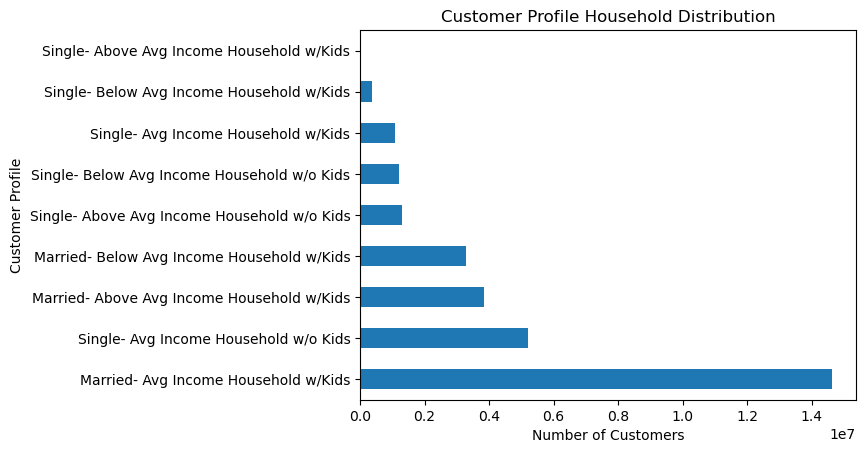

In [139]:
# Bar chart

bar_profiles_HI = df_include_merged['Customer_Profile_Household_Income'].value_counts().plot.barh()

# Legend

bar_profiles_HI.set(xlabel='Number of Customers', ylabel='Customer Profile', title='Customer Profile Household Distribution')

##### Export Visualization

In [140]:
bar_profiles_HI.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiles_HI.png'), bbox_inches = 'tight')

#### Number of Customers by Income Profile

In [141]:
# Create Bar chart with legends

[Text(0.5, 0, 'Number of Customers'),
 Text(0, 0.5, 'Customer Profile'),
 Text(0.5, 1.0, 'Customer Profile Income Distribution')]

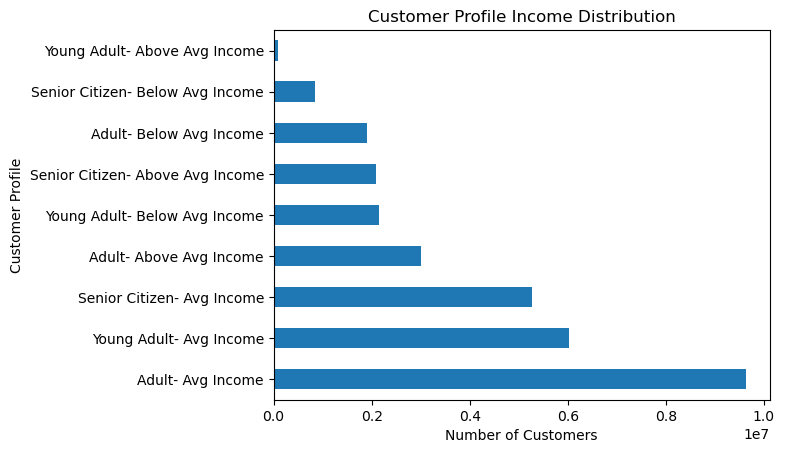

In [142]:
# Bar chart

bar_profiles_AI = df_include_merged['Customer_Profile_Age_Income'].value_counts().plot.barh()

# Legend

bar_profiles_AI.set(xlabel='Number of Customers', ylabel='Customer Profile', title='Customer Profile Income Distribution')

##### Export Visualization

In [143]:
bar_profiles_AI.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profiles_AI.png'), bbox_inches = 'tight')

### 7. Q7- Aggregation

##### Frequency Aggregation

In [144]:
# Frequency Aggregation for Household Type and Income

In [145]:
df_include_merged.groupby('Customer_Profile_Household_Income').agg({'time_elapsed_since_last_order': ['mean', 'min', 'max']})

time_elapsed_since_last_order  \
                                                                     mean   
Customer_Profile_Household_Income                                           
Married- Above Avg Income Household w/Kids                      10.747157   
Married- Avg Income Household w/Kids                            10.772675   
Married- Below Avg Income Household w/Kids                      11.125478   
Single- Above Avg Income Household w/Kids                        8.994550   
Single- Above Avg Income Household w/o Kids                     10.655595   
Single- Avg Income Household w/Kids                             10.693990   
Single- Avg Income Household w/o Kids                           10.755655   
Single- Below Avg Income Household w/Kids                       10.990695   
Single- Below Avg Income Household w/o Kids                     11.094540   

                                                        
                                             min   max  
Customer_Profile_Household_Income                       
Married- Above Avg Income Household w/Kids   0.0  30.0  
Married- Avg Income Household w/Kids         0.0  30.0  
Married- Below Avg Income Household w/Kids   0.0  30.0  
Single- Above Avg Income Household w/Kids    0.0  30.0  
Single- Above Avg Income Household w/o Kids  0.0  30.0  
Single- Avg Income Household w/Kids          0.0  30.0  
Single- Avg Income Household w/o Kids        0.0  30.0  
Single- Below Avg Income Household w/Kids    0.0  30.0  
Single- Below Avg Income Household w/o Kids  0.0  30.0

In [146]:
# Frequency Aggregation for Age and Income

In [147]:
df_include_merged.groupby('Customer_Profile_Age_Income').agg({'time_elapsed_since_last_order': ['mean', 'min', 'max']})

time_elapsed_since_last_order           
                                                          mean  min   max
Customer_Profile_Age_Income                                              
Adult- Above Avg Income                              10.732851  0.0  30.0
Adult- Avg Income                                    10.754480  0.0  30.0
Adult- Below Avg Income                              11.240526  0.0  30.0
Senior Citizen- Above Avg Income                     10.715051  0.0  30.0
Senior Citizen- Avg Income                           10.770768  0.0  30.0
Senior Citizen- Below Avg Income                     11.122948  0.0  30.0
Young Adult- Above Avg Income                        10.270644  0.0  30.0
Young Adult- Avg Income                              10.774482  0.0  30.0
Young Adult- Below Avg Income                        10.983127  0.0  30.0

##### Expenditure Aggregation

In [148]:
# Expenditure Aggregation for Household Type and Income

In [149]:
df_include_merged.groupby('Customer_Profile_Household_Income').agg({'prices': ['mean', 'min', 'max']})

prices           
                                                 mean  min   max
Customer_Profile_Household_Income                               
Married- Above Avg Income Household w/Kids   7.954047  1.0  25.0
Married- Avg Income Household w/Kids         7.944973  1.0  25.0
Married- Below Avg Income Household w/Kids   6.937776  1.0  25.0
Single- Above Avg Income Household w/Kids    7.962347  1.0  25.0
Single- Above Avg Income Household w/o Kids  7.939210  1.0  25.0
Single- Avg Income Household w/Kids          7.962448  1.0  25.0
Single- Avg Income Household w/o Kids        7.947630  1.0  25.0
Single- Below Avg Income Household w/Kids    7.347629  1.0  25.0
Single- Below Avg Income Household w/o Kids  6.982571  1.0  25.0

In [150]:
df_include_merged.groupby('Customer_Profile_Age_Income').agg({'prices': ['mean', 'min', 'max']})

prices           
                                      mean  min   max
Customer_Profile_Age_Income                          
Adult- Above Avg Income           7.944664  1.0  25.0
Adult- Avg Income                 7.943643  1.0  25.0
Adult- Below Avg Income           6.804867  1.0  25.0
Senior Citizen- Above Avg Income  7.963507  1.0  25.0
Senior Citizen- Avg Income        7.940614  1.0  25.0
Senior Citizen- Below Avg Income  6.512884  1.0  25.0
Young Adult- Above Avg Income     7.816812  1.0  25.0
Young Adult- Avg Income           7.956365  1.0  25.0
Young Adult- Below Avg Income     7.319110  1.0  25.0

### 8. Q8- Indentify if there is a difference in customer behavior across regions

In [151]:
# Create crosstab to view correlations

##### Pivot- Region and Household Income Profile

In [153]:
pivot_profiles_HI_region = pd.crosstab(df_include_merged['Region'], df_include_merged['Customer_Profile_Household_Income'], dropna = False)


# View pivot

pivot_profiles_HI_region

Customer_Profile_Household_Income,Married- Above Avg Income Household w/Kids,Married- Avg Income Household w/Kids,Married- Below Avg Income Household w/Kids,Single- Above Avg Income Household w/Kids,Single- Above Avg Income Household w/o Kids,Single- Avg Income Household w/Kids,Single- Avg Income Household w/o Kids,Single- Below Avg Income Household w/Kids,Single- Below Avg Income Household w/o Kids
Region,,,,,,,,,
Midwest,845726,3119750,693287,2523,275661,241160,1154164,80956,248703
Northeast,680931,2606384,570142,774,229647,196011,902442,59998,223739
South,1259306,4856295,1114604,8335,438103,368405,1729403,129165,416846
West,989774,3762910,831147,3722,346379,264166,1327560,100343,308426
nan,73706,291278,67781,594,25351,19268,100488,7191,20120


##### Pivot- Department and Household Income Profile

In [155]:
pivot_profiles_HI_dept = pd.crosstab(df_include_merged['Department'], df_include_merged['Customer_Profile_Household_Income'], dropna = False)


# View pivot

pivot_profiles_HI_dept

Customer_Profile_Household_Income,Married- Above Avg Income Household w/Kids,Married- Avg Income Household w/Kids,Married- Below Avg Income Household w/Kids,Single- Above Avg Income Household w/Kids,Single- Above Avg Income Household w/o Kids,Single- Avg Income Household w/Kids,Single- Avg Income Household w/o Kids,Single- Below Avg Income Household w/Kids,Single- Below Avg Income Household w/o Kids
Department,,,,,,,,,
alcohol,21513,61790,16139,470,7532,5845,23516,2065,5804
babies,52269,203979,31435,225,18916,15162,72621,3994,11791
bakery,146575,533982,108073,673,48870,40105,194055,13132,39561
beverages,307411,1149640,350426,1233,105401,82337,411307,35538,128641
breakfast,82890,306974,86412,383,27435,23419,109326,9692,31564
bulk,3651,15711,4456,2,1274,1233,5266,398,1460
canned goods,132751,495703,84123,672,44015,36527,175419,11278,31586
dairy eggs,654219,2488777,499589,2923,222919,188016,884653,60089,190643
deli,124696,474937,102700,406,42485,35162,171556,12551,39341


##### Pivot- Frequency and Household Income Profile

In [156]:
pivot_profiles_HI_freq = pd.crosstab(df_include_merged['frequency_flag'], df_include_merged['Customer_Profile_Household_Income'], dropna = False)


# View pivot

pivot_profiles_HI_freq

Customer_Profile_Household_Income,Married- Above Avg Income Household w/Kids,Married- Avg Income Household w/Kids,Married- Below Avg Income Household w/Kids,Single- Above Avg Income Household w/Kids,Single- Above Avg Income Household w/o Kids,Single- Avg Income Household w/Kids,Single- Avg Income Household w/o Kids,Single- Below Avg Income Household w/Kids,Single- Below Avg Income Household w/o Kids
frequency_flag,,,,,,,,,
Frequent Customer,2659489,10074257,2167048,13615,908440,758636,3576717,259271,804435
Non_frequent_customer,345725,1334355,360795,413,117539,99001,470208,39500,129907
Regular customer,844229,3228005,749118,1920,289162,231373,1167132,78882,283492


##### Pivot- Price Range and Household Income Profile

In [157]:
pivot_profiles_HI_price = pd.crosstab(df_include_merged['price_range_loc'], df_include_merged['Customer_Profile_Household_Income'], dropna = False)


# View pivot

pivot_profiles_HI_price

Customer_Profile_Household_Income,Married- Above Avg Income Household w/Kids,Married- Avg Income Household w/Kids,Married- Below Avg Income Household w/Kids,Single- Above Avg Income Household w/Kids,Single- Above Avg Income Household w/o Kids,Single- Avg Income Household w/Kids,Single- Avg Income Household w/o Kids,Single- Below Avg Income Household w/Kids,Single- Below Avg Income Household w/o Kids
price_range_loc,,,,,,,,,
High-range product,56353,203164,21987,373,18231,14877,71076,3747,8149
Low-range product,1146114,4362572,1285150,4655,391905,323305,1554466,133847,472886
Mid-range product,2646976,10070881,1969824,10920,905005,750828,3588515,240059,736799


##### Pivot- Loyalty and Household Income Profile

In [158]:
pivot_profiles_HI_loyalty = pd.crosstab(df_include_merged['loyalty_flag'], df_include_merged['Customer_Profile_Household_Income'], dropna = False)


# View pivot

pivot_profiles_HI_loyalty

Customer_Profile_Household_Income,Married- Above Avg Income Household w/Kids,Married- Avg Income Household w/Kids,Married- Below Avg Income Household w/Kids,Single- Above Avg Income Household w/Kids,Single- Above Avg Income Household w/o Kids,Single- Avg Income Household w/Kids,Single- Avg Income Household w/o Kids,Single- Below Avg Income Household w/Kids,Single- Below Avg Income Household w/o Kids
loyalty_flag,,,,,,,,,
Loyal customer,1279839,4907541,1021472,7949,448817,366684,1759898,118632,382905
New customer,583052,2215606,584888,737,196228,159268,785093,61963,221015
Regular customer,1986552,7513470,1670601,7262,670096,563058,2669066,197058,613914


##### Pivot- Region and Income Profile

In [159]:
pivot_profiles_AI_region = pd.crosstab(df_include_merged['Region'], df_include_merged['Customer_Profile_Age_Income'], dropna = False)


# View pivot

pivot_profiles_AI_region

Customer_Profile_Age_Income,Adult- Above Avg Income,Adult- Avg Income,Adult- Below Avg Income,Senior Citizen- Above Avg Income,Senior Citizen- Avg Income,Senior Citizen- Below Avg Income,Young Adult- Above Avg Income,Young Adult- Avg Income,Young Adult- Below Avg Income
Region,,,,,,,,,
Midwest,662777,2098241,407303,444572,1128889,171371,16561,1287944,444272
Northeast,528333,1658037,327836,370170,965554,150540,12849,1081246,375503
South,982034,3202311,654309,694346,1737171,279313,29364,2014621,726993
West,774946,2490658,472971,545000,1337974,217206,19929,1526004,549739
nan,58834,184506,37025,38766,106891,14983,2051,119637,43084


##### Pivot- Department and income Profile

In [161]:
pivot_profiles_AI_dept = pd.crosstab(df_include_merged['Department'], df_include_merged['Customer_Profile_Age_Income'], dropna = False)


# View pivot

pivot_profiles_AI_dept

Customer_Profile_Age_Income,Adult- Above Avg Income,Adult- Avg Income,Adult- Below Avg Income,Senior Citizen- Above Avg Income,Senior Citizen- Avg Income,Senior Citizen- Below Avg Income,Young Adult- Above Avg Income,Young Adult- Avg Income,Young Adult- Below Avg Income
Department,,,,,,,,,
alcohol,15799,41645,10289,11262,21232,4226,2454,28274,9493
babies,42171,138311,16406,28630,71005,6569,609,82446,24245
bakery,113337,353499,61428,78868,192763,25285,3913,221880,74053
beverages,239073,763086,208723,167579,415096,101353,7393,465102,204529
breakfast,64442,203090,51154,44251,108924,23952,2015,127705,52562
bulk,2930,9881,2674,1985,5793,1167,12,6536,2473
canned goods,103912,323412,46456,70439,178896,18174,3087,205341,62357
dairy eggs,511795,1634427,283413,354102,895062,122847,14164,1031957,344061
deli,98055,313476,60634,67425,172947,24827,2107,195232,69131


##### Pivot- Frequency and Income Profile

In [162]:
pivot_profiles_AI_freq = pd.crosstab(df_include_merged['frequency_flag'], df_include_merged['Customer_Profile_Age_Income'], dropna = False)


# View pivot

pivot_profiles_AI_freq

Customer_Profile_Age_Income,Adult- Above Avg Income,Adult- Avg Income,Adult- Below Avg Income,Senior Citizen- Above Avg Income,Senior Citizen- Avg Income,Senior Citizen- Below Avg Income,Young Adult- Above Avg Income,Young Adult- Avg Income,Young Adult- Below Avg Income
frequency_flag,,,,,,,,,
Frequent Customer,2067547,6645388,1234274,1453969,3626871,554433,60028,4137351,1442047
Non_frequent_customer,274052,877240,217974,184042,484616,91673,5583,541708,220555
Regular customer,665325,2111125,447196,454843,1164992,187307,15143,1350393,476989


##### Pivot- Price Range and Income Profile

In [163]:
pivot_profiles_AI_price = pd.crosstab(df_include_merged['price_range_loc'], df_include_merged['Customer_Profile_Age_Income'], dropna = False)


# View pivot

pivot_profiles_AI_price

Customer_Profile_Age_Income,Adult- Above Avg Income,Adult- Avg Income,Adult- Below Avg Income,Senior Citizen- Above Avg Income,Senior Citizen- Avg Income,Senior Citizen- Below Avg Income,Young Adult- Above Avg Income,Young Adult- Avg Income,Young Adult- Below Avg Income
price_range_loc,,,,,,,,,
High-range product,42534,132135,10774,30350,73400,3166,2073,83582,19943
Low-range product,897099,2872581,769483,621036,1577973,360107,24539,1789789,762293
Mid-range product,2067291,6629037,1119187,1441468,3625106,470140,54142,4156081,1357355


##### Pivot- Loyalty and Income Profile

In [164]:
pivot_profiles_AI_loyalty = pd.crosstab(df_include_merged['loyalty_flag'], df_include_merged['Customer_Profile_Age_Income'], dropna = False)


# View pivot

pivot_profiles_AI_loyalty

Customer_Profile_Age_Income,Adult- Above Avg Income,Adult- Avg Income,Adult- Below Avg Income,Senior Citizen- Above Avg Income,Senior Citizen- Avg Income,Senior Citizen- Below Avg Income,Young Adult- Above Avg Income,Young Adult- Avg Income,Young Adult- Below Avg Income
loyalty_flag,,,,,,,,,
Loyal customer,1002953,3266411,579994,701528,1768554,256090,32124,1999158,686925
New customer,450918,1443013,353439,320609,802875,154296,8490,914079,360131
Regular customer,1553053,4924329,966011,1070717,2705050,423027,40140,3116215,1092535


# Export df

In [165]:
df_include_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final_orders_products_include.pkl'))